In [30]:
# Task 1 : Iris Classification Model



# Name : Hikma Yimer Mohammed
# Batch : A67 (August 2024)
# Internship : Data Science
# Aim : Build an Iris Classification Model

In [31]:
# Import basic libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
# Load Dataset

iris_df = pd.read_csv("IRIS.csv")
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [33]:
# Explore Dataset

iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [34]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [35]:
iris_df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

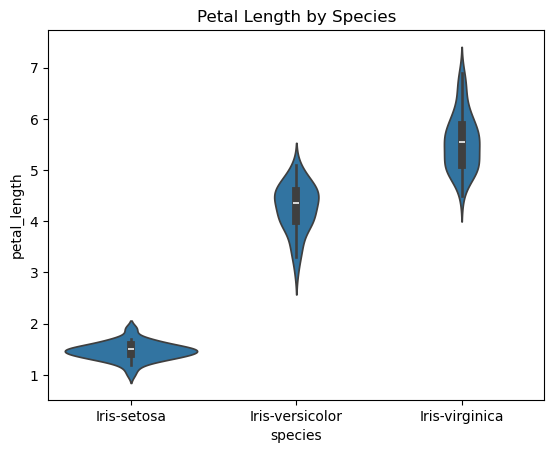

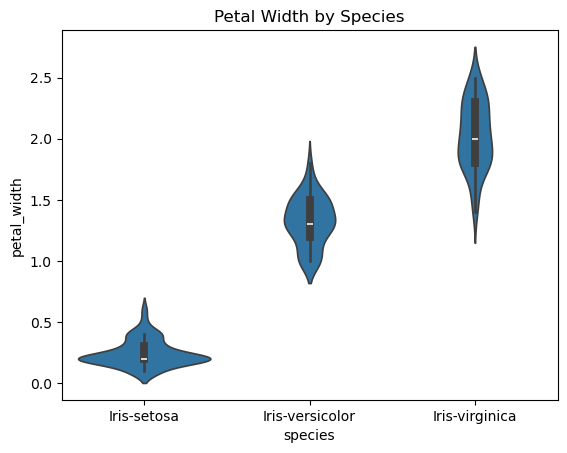

In [36]:
# Data Visualization

sns.violinplot(x="species", y="petal_length", data=iris_df)
plt.title("Petal Length by Species")
plt.show()

sns.violinplot(x="species", y="petal_width", data=iris_df)
plt.title("Petal Width by Species")
plt.show()

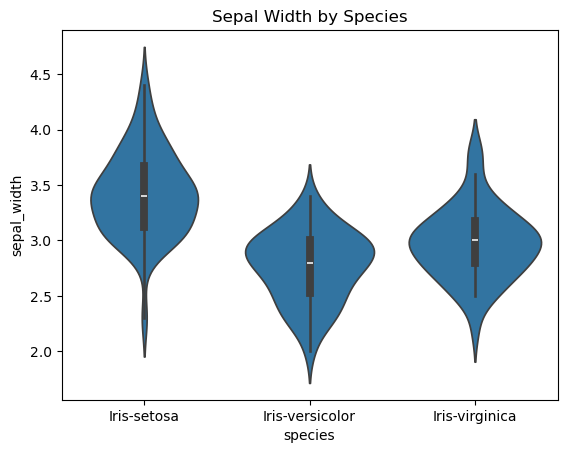

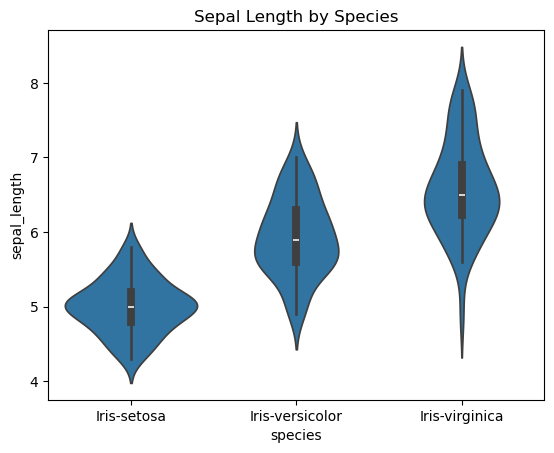

In [37]:
sns.violinplot(x="species", y="sepal_width", data=iris_df)
plt.title("Sepal Width by Species")
plt.show()

sns.violinplot(x="species", y="sepal_length", data=iris_df)
plt.title("Sepal Length by Species")
plt.show()

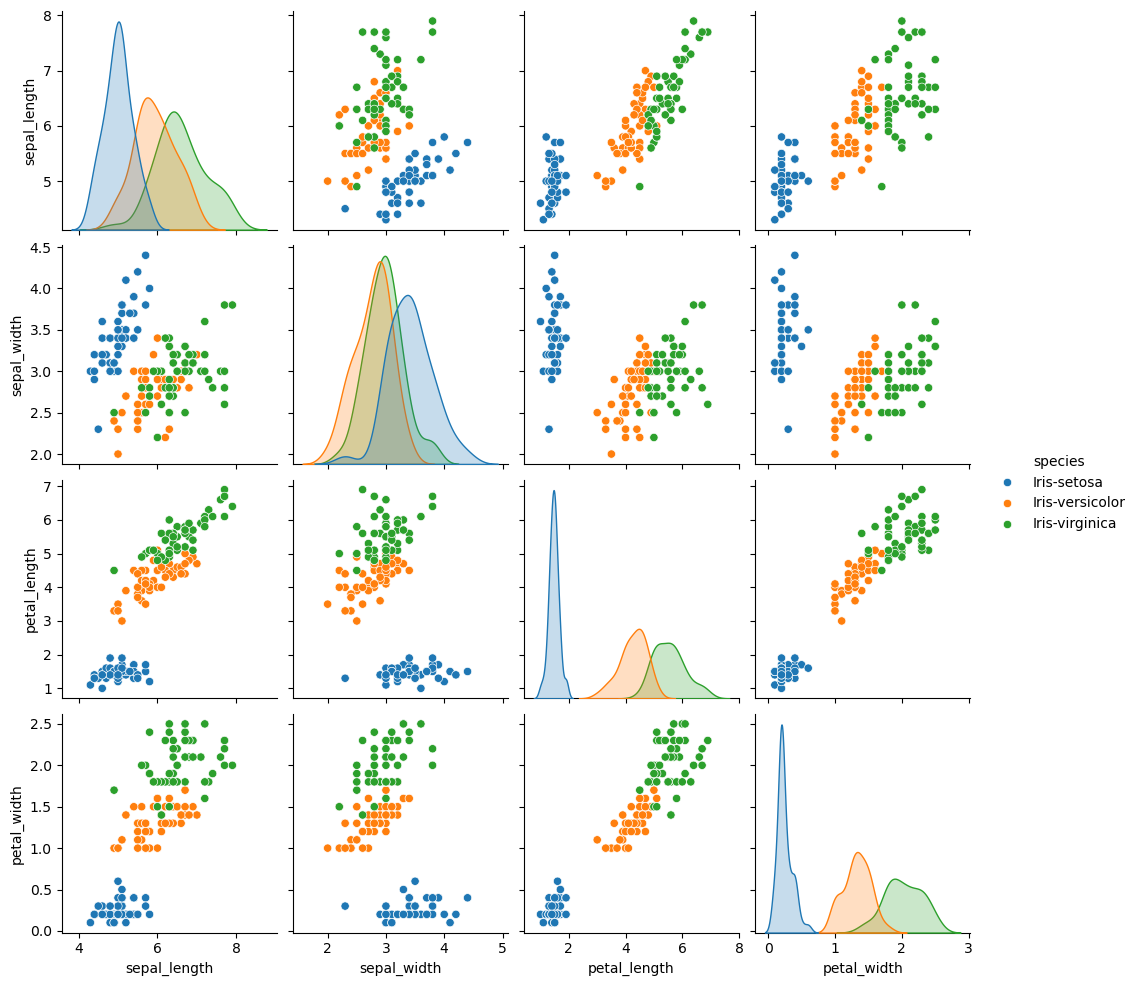

In [38]:
sns.pairplot(iris_df, hue='species')
plt.show()

In [39]:
y = iris_df["species"]
x = iris_df.drop("species", axis = 1)
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [40]:
# Train Model


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)


In [41]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [42]:
model.fit(x_train, y_train)
model.score(x_train, y_train)

0.9833333333333333

In [43]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [44]:
x_train

,sepal_length,sepal_width,petal_length,petal_width
62,6.0,2.2,4.0,1.0
23,5.1,3.3,1.7,0.5
26,5.0,3.4,1.6,0.4
48,5.3,3.7,1.5,0.2
2,4.7,3.2,1.3,0.2
...,...,...,...,...
71,6.1,2.8,4.0,1.3
12,4.8,3.0,1.4,0.1
50,7.0,3.2,4.7,1.4
7,5.0,3.4,1.5,0.2


In [45]:
y_pred = knn.predict(x_test)


In [46]:
# Model Evaluation

from sklearn.metrics import accuracy_score, classification_report
print("Accuracy of testing dataset:", accuracy_score(y_test,y_pred))


Accuracy of testing dataset: 1.0


In [47]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      1.00      1.00        12
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [48]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[ 8  0  0]
 [ 0 12  0]
 [ 0  0 10]]


In [51]:
#Test model with sample data

sample_df = pd.DataFrame({"sepal_length":[6.1], "sepal_width":[1.5],"petal_length":[3.3], "petal_width":[2.5]})

In [54]:
pred = knn.predict(sample_df)
print("The flower you described is probably an", pred[0])

The flower you described is probably an Iris-versicolor


In [ ]:
# Save Model

import joblib
joblib.dump(model, "iris_model.pk1")